#Relevant Imports and PATH/IMAGE_NAME variable to be changed accordingly

In [2]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import cv2
import time

import matplotlib.pyplot as plt
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

#Change path to folder where script and images is

PATH = "/content/drive/My Drive/Colab_Notebooks/ECSE_415_A4/"

#Name of the image used with yolov3 detection, this is to be modified according to the name of the image that will be tested on
IMAGE_NAME = "Montreal_Picture.jpg"

Mounted at /content/drive


#CIFAR 10 Class that trains a Classifier with varying kernel sizes on the CIFAR Dataset

In [2]:
class CIFAR10_CNN_Classifier:

    def __init__(self):
        self.init_model()
        self.criterion = nn.CrossEntropyLoss()
        self.optimizer = optim.SGD(self.model.parameters(), lr=0.002)
        self.runtime_data = {}
        self.accuracy_data = {}

    def init_model(self, kernel_size=3):
        self.model = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=kernel_size, padding=kernel_size//2),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=kernel_size, padding=kernel_size//2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 64, kernel_size=kernel_size, padding=kernel_size//2),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=kernel_size, padding=kernel_size//2),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(64*16*16, 10)
        )

    def train(self, epochs=10, kernel_size=3):
        self.init_model(kernel_size)
        self.optimizer = optim.SGD(self.model.parameters(), lr=0.002)

        transform = transforms.Compose([transforms.ToTensor(),
                                        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

        trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
        trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)

        # Load validation dataset
        valset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
        valloader = torch.utils.data.DataLoader(valset, batch_size=32, shuffle=False)

        self.runtime_data[kernel_size] = []
        self.accuracy_data[kernel_size] = []

        for epoch in range(epochs):
            start_time = time.time()
            running_loss = 0.0
            for i, data in enumerate(trainloader, 0):
                inputs, labels = data
                self.optimizer.zero_grad()
                outputs = self.model(inputs)
                loss = self.criterion(outputs, labels)
                loss.backward()
                self.optimizer.step()
                running_loss += loss.item()

            # Validate model after each epoch
            correct = 0
            total = 0
            with torch.no_grad():
                for data in valloader:
                    images, labels = data
                    outputs = self.model(images)
                    _, predicted = torch.max(outputs.data, 1)
                    total += labels.size(0)
                    correct += (predicted == labels).sum().item()

            accuracy = 100 * correct / total
            self.accuracy_data[kernel_size].append(accuracy)

            end_time = time.time()
            elapsed_time = end_time - start_time
            self.runtime_data[kernel_size].append(elapsed_time)

            print(f"Kernel Size {kernel_size} - Epoch {epoch+1} - Loss: {running_loss / (i+1)} - Time: {elapsed_time:.2f}s - Validation Accuracy: {accuracy:.2f}%")


    def plot_all_runtimes(self):
      #Plot runtimes between epochs for both kernels to visually compare them
      #classifier.plot_cumulative_runtimes()
      for kernel_size, runtimes in classifier.runtime_data.items():
          # Plot individual epoch times
          plt.plot(range(1, len(runtimes)+1), runtimes, label=f'Epoch Runtime Kernel Size {kernel_size}', linestyle='--', marker='o')

          # Calculate and plot cumulative runtimes
          cumulative_runtimes = []
          accumulated_time = 0
          for runtime in runtimes:
              accumulated_time += runtime
              cumulative_runtimes.append(accumulated_time)
          plt.plot(range(1, len(cumulative_runtimes)+1), cumulative_runtimes, label=f'Cumulative Kernel Size {kernel_size}', linestyle='-', marker='.')

      plt.xlabel('Epoch')
      plt.ylabel('Runtime (seconds)')
      plt.title('Runtime vs Epoch for Different Kernel Sizes')
      plt.legend()
      plt.grid(True)
      plt.tight_layout()
      plt.show()


    def plot_accuracy(self):
      for kernel_size, accuracies in self.accuracy_data.items():
          plt.plot(range(1, len(accuracies)+1), accuracies, label=f'Kernel Size {kernel_size}', marker='o')

      plt.xlabel('Epoch')
      plt.ylabel('Validation Accuracy (%)')
      plt.title('Validation Accuracy vs Epoch for Different Kernel Sizes')
      plt.legend()
      plt.grid(True)
      plt.tight_layout()
      plt.show()


In [3]:
#Create classifier object
classifier = CIFAR10_CNN_Classifier()

In [4]:
#Train model with kernel_size of 3
classifier.train(kernel_size=3)

100%|██████████| 170498071/170498071 [00:04<00:00, 40087928.60it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Kernel Size 3 - Epoch 1 - Loss: 2.236961522852848 - Time: 207.43s - Validation Accuracy: 27.09%
Kernel Size 3 - Epoch 2 - Loss: 1.9351943592497423 - Time: 200.37s - Validation Accuracy: 34.74%
Kernel Size 3 - Epoch 3 - Loss: 1.7350476558438799 - Time: 198.34s - Validation Accuracy: 41.61%
Kernel Size 3 - Epoch 4 - Loss: 1.5800189130670812 - Time: 197.83s - Validation Accuracy: 45.09%
Kernel Size 3 - Epoch 5 - Loss: 1.4804057301196698 - Time: 198.82s - Validation Accuracy: 47.97%
Kernel Size 3 - Epoch 6 - Loss: 1.4144385654195637 - Time: 203.98s - Validation Accuracy: 49.55%
Kernel Size 3 - Epoch 7 - Loss: 1.361981231092415 - Time: 206.63s - Validation Accuracy: 52.21%
Kernel Size 3 - Epoch 8 - Loss: 1.315418789459968 - Time: 205.15s - Validation Accuracy: 53.97%
Kernel Size 3 - Epoch 9 - Loss: 1.2718554472816501 - Time: 207.87s - Validation Accuracy: 53.60%
Kernel Size 3 - Epoch 10 - Loss: 1.228799

In [5]:
#Train model with kernel size of 5
classifier.train(kernel_size=5)

Files already downloaded and verified
Files already downloaded and verified
Kernel Size 5 - Epoch 1 - Loss: 2.1609342998216645 - Time: 409.00s - Validation Accuracy: 32.31%
Kernel Size 5 - Epoch 2 - Loss: 1.7732243279349094 - Time: 405.19s - Validation Accuracy: 40.58%
Kernel Size 5 - Epoch 3 - Loss: 1.5781356525665204 - Time: 398.53s - Validation Accuracy: 46.40%
Kernel Size 5 - Epoch 4 - Loss: 1.4728779766091307 - Time: 396.91s - Validation Accuracy: 48.80%
Kernel Size 5 - Epoch 5 - Loss: 1.3889424416855674 - Time: 414.70s - Validation Accuracy: 49.80%
Kernel Size 5 - Epoch 6 - Loss: 1.3145542293119643 - Time: 409.69s - Validation Accuracy: 54.36%
Kernel Size 5 - Epoch 7 - Loss: 1.2507315076701702 - Time: 414.76s - Validation Accuracy: 53.28%
Kernel Size 5 - Epoch 8 - Loss: 1.1961199201152481 - Time: 404.76s - Validation Accuracy: 56.63%
Kernel Size 5 - Epoch 9 - Loss: 1.1444548260151235 - Time: 394.73s - Validation Accuracy: 58.69%
Kernel Size 5 - Epoch 10 - Loss: 1.095627611139533 

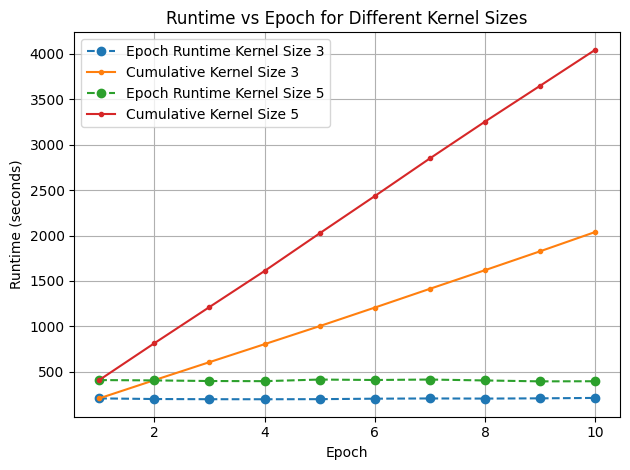

In [7]:
#Plot runtimes between epochs for both kernels to visually compare them
classifier.plot_all_runtimes()

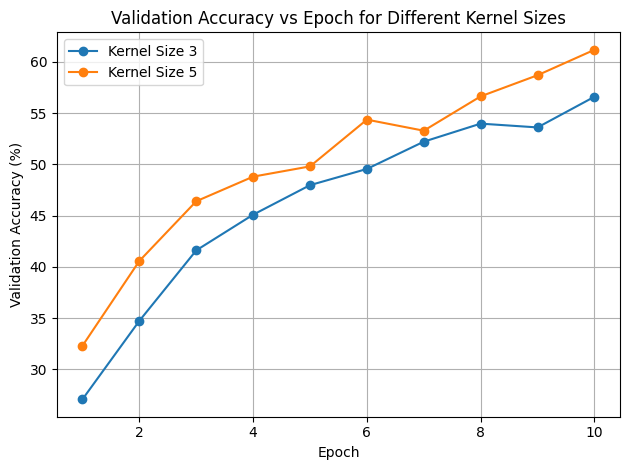

In [6]:
classifier.plot_accuracy()

####  The charts show that the CNN with a 5x5 kernel size takes longer to run per epoch compared to the 3x3 kernel, yet achieves slightly better validation accuracy. Despite this, the difference in performance isn't vast. Other factors, such as network depth, weight initialization, and learning rate, can also influence CNN's efficacy. Balancing kernel size with these factors is essential for optimal performance and efficiency.


In [8]:
DarkNetDirectory = PATH + 'DarkNet'

# Path of the image yolov3 will detect on
Image_Path = PATH + IMAGE_NAME

# Check if the directory exists and remove it using shell command
if os.path.exists(DarkNetDirectory):
    !rm -rf "$DarkNetDirectory"

# Now create the directory
os.makedirs(DarkNetDirectory, exist_ok=True)

# Finally, clone the git repository into the directory
!git clone https://github.com/pjreddie/darknet "$DarkNetDirectory"


Cloning into '/content/drive/My Drive/Colab_Notebooks/ECSE_415_A4/DarkNet'...
remote: Enumerating objects: 5955, done.
remote: Total 5955 (delta 0), reused 0 (delta 0), pack-reused 5955
Receiving objects: 100% (5955/5955), 6.37 MiB | 13.34 MiB/s, done.
Resolving deltas: 100% (3932/3932), done.
Updating files: 100% (979/979), done.


In [9]:
DarkPath = DarkNetDirectory
!make -C "$DarkPath"

make: Entering directory '/content/drive/My Drive/Colab_Notebooks/ECSE_415_A4/DarkNet'
mkdir -p obj
mkdir -p backup
mkdir -p results
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/gemm.c -o obj/gemm.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/utils.c -o obj/utils.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/cuda.c -o obj/cuda.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/deconvolutional_layer.c -o obj/deconvolutional_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/convolutional_layer.c -o obj/convolutional_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/list.c -o obj/list.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-resul

In [10]:
!wget -P "$DarkPath" https://pjreddie.com/media/files/yolov3.weights

--2023-11-03 00:57:52--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘/content/drive/My Drive/Colab_Notebooks/ECSE_415_A4/DarkNet/yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  39.2MB/s    in 6.6s    

2023-11-03 00:57:59 (36.0 MB/s) - ‘/content/drive/My Drive/Colab_Notebooks/ECSE_415_A4/DarkNet/yolov3.weights’ saved [248007048/248007048]



In [11]:
current_directory = os.getcwd()

os.chdir(DarkNetDirectory)

!./darknet detect cfg/yolov3.cfg yolov3.weights "$Image_Path" > output.txt

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

### Yolov3 confidence levels on detected objects

In [12]:
# Open the file in read mode
with open('output.txt', 'r') as file:
    # Read the contents of the file
    contents = file.read()

    # Print the contents
    print(contents)


/content/drive/My Drive/Colab_Notebooks/ECSE_415_A4/Montreal_Picture.jpg: Predicted in 26.735194 seconds.
traffic light: 80%
traffic light: 80%
traffic light: 70%
motorbike: 95%
car: 100%
bicycle: 92%
person: 99%
person: 98%
person: 98%
person: 91%
person: 86%
person: 72%
person: 70%
person: 57%



#Table Summary of Predictions

In [13]:
# Define the file path
file_path = "output.txt"

# Create a dictionary to count occurrences of each category
category_counts = {}

# Open the file in read mode
with open(file_path, 'r') as file:
    # Iterate over each line in the file
    for line in file:
        # Skip the line if it contains "Predicted in"
        if "Predicted in" in line:
            continue
        category = line.split(':')[0].strip()
        category_counts[category] = category_counts.get(category, 0) + 1

# Print the table header
print(f"{'Category':<20} | {'Quantity':<10}")
print('-' * 33)

# Print the table rows
for category, count in category_counts.items():
    print(f"{category:<20} | {count:<10}")


Category             | Quantity  
---------------------------------
traffic light        | 3         
motorbike            | 1         
car                  | 1         
bicycle              | 1         
person               | 8         


# Original Image

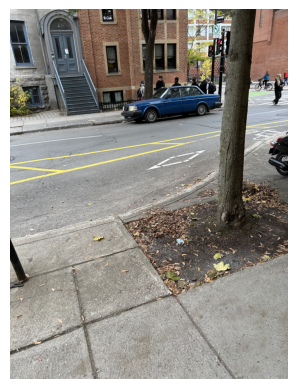

In [14]:
# Load the image using OpenCV
img = cv2.imread("../" + IMAGE_NAME, cv2.IMREAD_COLOR)

# Convert the image from BGR to RGB format
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.imshow(img_rgb)
plt.axis('off')  # Hide the axis values
plt.show()

# Predicted Image

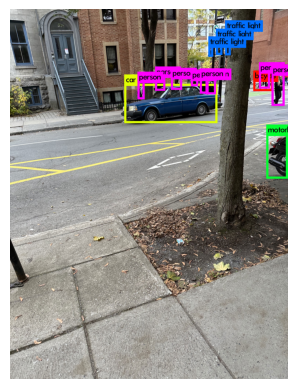

In [15]:
# Load the image using OpenCV
img = cv2.imread("predictions.jpg", cv2.IMREAD_COLOR)

# Convert the image from BGR to RGB format
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.imshow(img_rgb)
plt.axis('off')  # Hide the axis values
plt.show()